# 🏁 Módulo 4 – Preguntas de Negocio

**Objetivo del módulo**  
Aplicar todo lo aprendido (limpieza, EDA, visualización, agrupaciones) para **responder preguntas de negocio reales** con Python y Pandas.

**¿Por qué es importante?**  
Un analista de datos no solo organiza tablas: transforma datos en **insights accionables** que guían decisiones de producto, marketing o estrategia. Saber plantear y contestar preguntas concretas demuestra el valor práctico de tus habilidades técnicas.

---

En este notebook resolverás **20 preguntas** usando el dataset limpio `salarios_pais.csv`.  
Cada pregunta viene acompañada de una celda *Markdown* (enunciado) y su celda de código con la solución.



---
## 0 · Setup
Cargamos librerías y configuramos Seaborn para que los gráficos se vean con un estilo agradable.


In [1]:
%pip install seaborn matplotlib pandas numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# Print current working directory and sys.path for debugging
print("Current working directory:", Path.cwd())
print("sys.path before:", sys.path)

# Add the parent directory to sys.path so 'cursos' can be imported


project_root = Path.cwd().parent.parent.parent  # Ajusta según tu estructura real
if str(project_root) not in sys.path:
	sys.path.append(str(project_root))

print("sys.path after:", sys.path)

from cursos.analisis_datos.utils.paths import DATA_PROCESSED_DIR
path_salarios_pais = DATA_PROCESSED_DIR / "salarios_pais.csv"
path_salarios_pais = str(path_salarios_pais)
print(f"Ruta del archivo salarios_pais: {path_salarios_pais}")
print(f"existe archivo salarios_pais: {Path(path_salarios_pais).exists()}")
df_salarios_pais = pd.read_csv(filepath_or_buffer=path_salarios_pais, sep=',', encoding='utf-8')
df_salarios_pais.head()

Note: you may need to restart the kernel to use updated packages.
Current working directory: c:\Users\joseg\OneDrive\Escritorio\PY_data\pydatapanama-cursos\cursos\analisis_datos\notebooks
sys.path before: ['c:\\Users\\joseg\\anaconda3\\envs\\pyda-py313\\python313.zip', 'c:\\Users\\joseg\\anaconda3\\envs\\pyda-py313\\DLLs', 'c:\\Users\\joseg\\anaconda3\\envs\\pyda-py313\\Lib', 'c:\\Users\\joseg\\anaconda3\\envs\\pyda-py313', '', 'c:\\Users\\joseg\\anaconda3\\envs\\pyda-py313\\Lib\\site-packages', 'c:\\Users\\joseg\\anaconda3\\envs\\pyda-py313\\Lib\\site-packages\\win32', 'c:\\Users\\joseg\\anaconda3\\envs\\pyda-py313\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\joseg\\anaconda3\\envs\\pyda-py313\\Lib\\site-packages\\Pythonwin']
sys.path after: ['c:\\Users\\joseg\\anaconda3\\envs\\pyda-py313\\python313.zip', 'c:\\Users\\joseg\\anaconda3\\envs\\pyda-py313\\DLLs', 'c:\\Users\\joseg\\anaconda3\\envs\\pyda-py313\\Lib', 'c:\\Users\\joseg\\anaconda3\\envs\\pyda-py313', '', 'c:\\Users\\joseg\\

,nombre,apellido,edad,pais,educacion_universitaria,nombre_de_la_empresa,cargo,anos_en_la_empresa,sueldo_anual_dolares,bono_anual_euros,bono_anual_dolares,capital,cantidad_de_habitantes,PIB,ingreso_per_capita,compensacion_total,senioridad
0,José,López,36,Chile,Sí,Mercado Libre,Python Developer,2,71841.0,4981.0,5479.1,Santiago,19116209.0,3.170000e+11,16580.0,77320.1,Junior
1,Fernanda,Vargas,39,Chile,Sí,Amazon,AI Software Engineer,2,142115.0,1252.0,1377.2,Santiago,19116209.0,3.170000e+11,16580.0,143492.2,Junior
2,Fernanda,Ramírez,30,Colombia,No,Facebook,Machine Learning Engineer,2,92278.0,5262.0,5788.2,Bogotá,51874024.0,3.430000e+11,6611.0,98066.2,Junior
3,José,Gómez,35,Chile,Sí,Mercado Libre,Python Developer,12,97130.0,3671.0,4038.1,Santiago,19116209.0,3.170000e+11,16580.0,101168.1,senior
4,Ana,Pérez,32,Panamá,No,Amazon,Project Manager,2,61413.0,10190.0,11209.0,Ciudad de Panamá,4468000.0,7.600000e+10,16995.0,72622.0,Junior


## 1️⃣ Pregunta  
**¿Cuál es la compensación total promedio en el dataset?**

### ¿Por qué importa?  
La media salarial brinda una referencia rápida para entender el nivel general de pago en la organización o sector. Permite comparar con benchmarks externos y detectar si la empresa está ofreciendo compensaciones competitivas.

### Pista  
La respuesta está a un solo método de distancia sobre la columna `compensacion_total`.

In [2]:
# Calcula la compensación total promedio
compansacion_total_promedio = df_salarios_pais['compensacion_total'].mean()
compensacion_por_pais = df_salarios_pais.groupby('pais')['compensacion_total'].mean().reset_index()
compensacion_por_pais.columns = ['pais', 'compensacion_total_promedio']     
print(compensacion_por_pais)
print(f"Compensación total promedio: {compansacion_total_promedio}")


         pais  compensacion_total_promedio
0   Argentina                 93348.609756
1       Chile                 98009.616216
2    Colombia                 98578.348837
3  Costa Rica                 92614.717949
4      México                 91380.732558
5      Panamá                 92684.865625
6        Perú                 93303.702941
7     Uruguay                 96447.094737
Compensación total promedio: 94583.36970684039


## 2️⃣ Pregunta  
**¿Quiénes son los 5 empleados con la compensación total más alta?**

### ¿Por qué importa?  
Identificar a los empleados mejor pagados ayuda a:  
- Detectar roles o perfiles críticos con alto valor de mercado.  
- Verificar consistencia salarial interna y posibles brechas injustificadas.  
- Analizar si los niveles de compensación se alinean con la estrategia de retención de talento.

### Pista   
Ordena la columna `compensacion_total` de forma descendente y toma solo las primeras 5 filas.

In [10]:
# Top 5 empleados con mayor compensación total
top_5_empleados = df_salarios_pais.nlargest(5, 'compensacion_total')
print("Top 5 empleados con mayor compensación total:")
print(top_5_empleados[['nombre', 'apellido', 'compensacion_total']])


Top 5 empleados con mayor compensación total:
    nombre   apellido  compensacion_total
94    Luis  Rodríguez            167806.7
162    Ana    Morales            165880.7
7    Pedro    Herrera            164982.1
143   Luis    Herrera            163275.9
86   Lucía     Flores            162450.4


## 3️⃣ Pregunta  
**¿Qué país registra la compensación total promedio más alta?**

### ¿Por qué importa?  
Conocer el país donde los salarios son más altos permite:  
- Evaluar mercados laborales competitivos y su impacto en costes de contratación.  
- Diseñar políticas de compensación diferenciadas por región.  
- Detectar posibles desalineamientos con el costo de vida o la estrategia global de la empresa.

### Pista  
Agrupa por `pais`, calcula el promedio de `compensacion_total` y ordena de mayor a menor.

In [11]:
# País con la compensación promedio más alta
pais_mayor_compensacion = compensacion_por_pais.loc[compensacion_por_pais['compensacion_total_promedio'].idxmax()]
print(f"País con la compensación promedio más alta: {pais_mayor_compensacion['pais']} con un promedio de {pais_mayor_compensacion['compensacion_total_promedio']:.2f}")


País con la compensación promedio más alta: Colombia con un promedio de 98578.35


## 4️⃣ Pregunta  
**¿Cómo se distribuye la compensación total según el nivel de senioridad?**  
*(Visualiza la comparación con un boxplot).*

### ¿Por qué importa?  
- Revela si existen diferencias salariales significativas entre Juniors y Seniors.  
- Permite detectar outliers (pagos extremadamente altos o bajos) por nivel.  
- Ayuda a planificar escalas de compensación equitativas y competitivas.

### Pista  
Usa `sns.boxplot()` con `x='senioridad'` y `y='compensacion_total'`.

C:\Users\joseg\AppData\Local\Temp\ipykernel_20356\659569449.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_salarios_pais, x='senioridad', y='compensacion_total', palette='Set2')


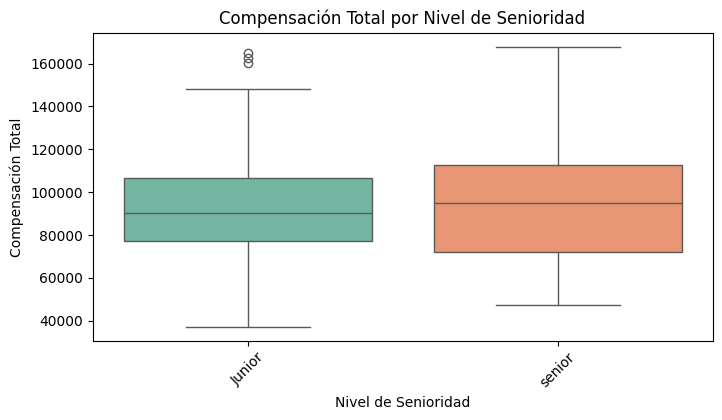

In [15]:
# Boxplot de compensación total por nivel de senioridad
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_salarios_pais, x='senioridad', y='compensacion_total', palette='Set2')
plt.title('Compensación Total por Nivel de Senioridad')
plt.xlabel('Nivel de Senioridad')
plt.ylabel('Compensación Total')
plt.xticks(rotation=45) 
plt.show()


## 5️⃣ Pregunta  
**¿Existe correlación entre los años en la empresa y la compensación total?**

### ¿Por qué importa?  
- Permite evaluar si la antigüedad impacta directamente en el salario.  
- Ayuda a validar políticas de incremento por permanencia.  
- Detectar una baja correlación podría indicar que la compensación está más ligada a desempeño o rol que a tiempo en la organización.

### Pista  
Calcula el coeficiente de correlación de Pearson entre `anos_en_la_empresa` y `compensacion_total`.

In [17]:
# Correlación entre antigüedad y compensación total
correlacion = df_salarios_pais['anos_en_la_empresa'].corr(df_salarios_pais['compensacion_total'])
print(f"Correlación entre antigüedad y compensación total: {correlacion}")

Correlación entre antigüedad y compensación total: 0.01714541129758088


## 6️⃣ Pregunta  
**¿Qué cargo presenta la mediana de compensación total más alta?**

### ¿Por qué importa?  
- La mediana es robusta frente a outliers; refleja el salario “típico” para cada rol.  
- Ayuda a identificar posiciones clave con mayor valor de mercado o responsabilidad.  
- Informa decisiones de contratación y alineación salarial interna.

### Pista  
Agrupa por `cargo`, calcula la **mediana** de `compensacion_total`, ordena en orden descendente y observa el primer resultado.

In [7]:
# Cargo con la mediana de compensación total más alta
compansacion_total_promedio_por_cargo = df_salarios_pais.groupby('cargo')['compensacion_total'].median().reset_index()
compansacion_total_promedio_por_cargo.columns = ['cargo', 'compensacion_total_median']
cargo_mayor_compensacion = compansacion_total_promedio_por_cargo.loc[compansacion_total_promedio_por_cargo['compensacion_total_median'].idxmax()]
print(f"Cargo con la mediana de compensación total más alta: {cargo_mayor_compensacion['cargo']} con una mediana de {cargo_mayor_compensacion['compensacion_total_median']}")
print(compansacion_total_promedio_por_cargo.sort_values(by='compensacion_total_median', ascending=False).head().reset_index())


Cargo con la mediana de compensación total más alta: AI Software Engineer con una mediana de 130957.7
   index                      cargo  compensacion_total_median
0      0       AI Software Engineer                   130957.7
1      4  Machine Learning Engineer                   110264.8
2      2              Data Engineer                    98864.3
3      3             Data Scientist                    96458.0
4      8          Software Engineer                    95662.6


## 7️⃣ Pregunta  
**¿Cómo es la distribución de los bonos anuales en dólares?**  
*(Construye un histograma e incluye la curva KDE para visualizar la densidad).*

### ¿Por qué importa?  
- Ayuda a ver si los bonos están concentrados en un rango específico o tienen una cola larga.  
- Detecta outliers que podrían distorsionar el promedio.  
- Facilita comparar políticas de incentivos entre departamentos o países.

### Pista  
Usa `sns.histplot()` sobre la columna `bono_anual_dolares`, pon `bins=30` y `kde=True`.

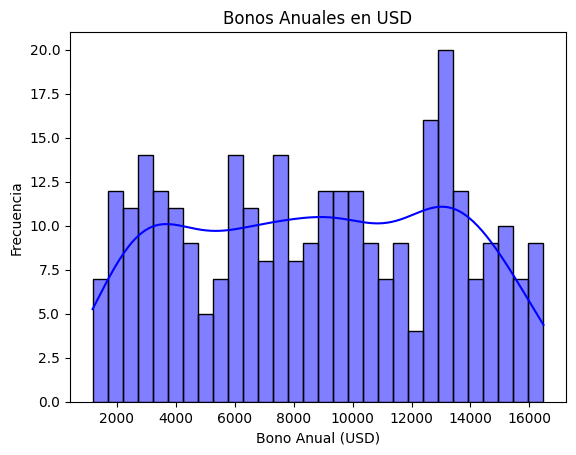

In [13]:
# Histograma y KDE de los bonos anuales en USD
sns.histplot(df_salarios_pais['bono_anual_dolares'], kde=True, bins=30, color='blue')
plt.title('Bonos Anuales en USD')
plt.xlabel('Bono Anual (USD)')
plt.ylabel('Frecuencia')
plt.show()

## 8️⃣ Pregunta  
**¿Qué proporción de empleados proviene de cada país?**  
*(Visualiza el resultado en un barplot).*

### ¿Por qué importa?  
- Mide la **representatividad geográfica** de la fuerza laboral.  
- Ayuda a detectar concentración en un país y oportunidades de diversificación.  
- Sirve como referencia para ajustar políticas de compensación y beneficio regional.

### Pista  
Calcula `value_counts(normalize=True)` sobre la columna `pais`, multiplícalo por 100 para obtener porcentajes y grafícalo con `plot(kind='bar')`.

Proporción de empleados por país (en %):
pais
Colombia      14.006515
México        14.006515
Argentina     13.355049
Costa Rica    12.703583
Uruguay       12.377850
Chile         12.052117
Perú          11.074919
Panamá        10.423453
Name: proportion, dtype: float64


C:\Users\joseg\AppData\Local\Temp\ipykernel_15208\1223767696.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcion_empleados_pais.index, y=proporcion_empleados_pais.values, palette='viridis')


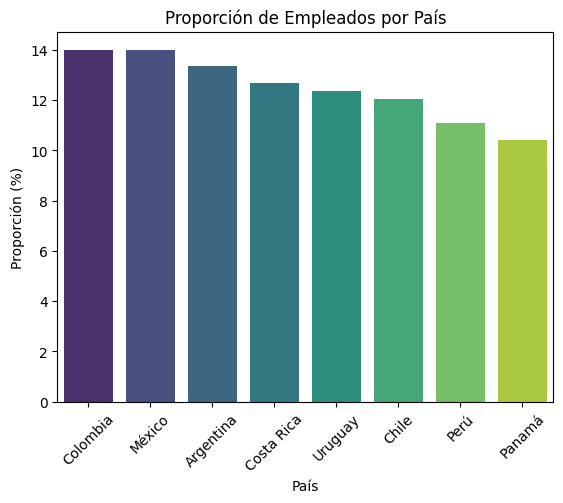

In [16]:
# Proporción de empleados por país (en %)
proporcion_empleados_pais = df_salarios_pais['pais'].value_counts(normalize=True) * 100
print("Proporción de empleados por país (en %):")
print(proporcion_empleados_pais)

sns.barplot(x=proporcion_empleados_pais.index, y=proporcion_empleados_pais.values, palette='viridis')
plt.title('Proporción de Empleados por País')
plt.xlabel('País')
plt.ylabel('Proporción (%)')    
plt.xticks(rotation=45)
plt.show()


## 9️⃣ Pregunta  
**¿Cuál es el bono anual máximo registrado para cada cargo?**

### ¿Por qué importa?  
- Revela el techo de incentivos para cada rol.  
- Permite verificar si ciertos cargos reciben bonos excepcionalmente altos (posibles outliers o políticas de bonificación agresivas).  
- Ayuda a diseñar esquemas de reconocimiento competitivos y equitativos.

### Pista  
Agrupa por `cargo`, aplica `max()` a `bono_anual_dolares` y ordena el resultado de mayor a menor.

In [20]:
# Bono anual máximo por cargo
bono_anual_maximo_por_cargo = df_salarios_pais.groupby('cargo')['bono_anual_dolares'].max().reset_index()
bono_anual_maximo_por_cargo.columns = ['cargo', 'bono_anual_max']
print("Bono anual máximo por cargo:")
print(bono_anual_maximo_por_cargo.sort_values(by='bono_anual_max', ascending=False).head().reset_index(drop=True))


Bono anual máximo por cargo:
                  cargo  bono_anual_max
0      Python Developer         16476.9
1         Data Engineer         16457.1
2        Data Scientist         16406.5
3  AI Software Engineer         16150.2
4       Project Manager         16079.8


## 🔟 Pregunta  
**¿Cuáles son los 3 países con más empleados que ocupan el cargo de *Data Scientist*?**

### ¿Por qué importa?  
- Indica dónde se concentra el talento de ciencia de datos en la organización.  
- Ayuda a orientar iniciativas de reclutamiento, formación y comunidades locales.  
- Puede revelar hubs de innovación o brechas regionales en ese perfil tan demandado.

### Pista  
Filtra el DataFrame por `cargo == "Data Scientist"` y aplica `value_counts()` sobre la columna `pais`, luego utiliza `.head(3)`.

In [24]:
# Top 3 países con más Data Scientists
top_3_paises_data_scientists = df_salarios_pais[df_salarios_pais['cargo'] == 'Data Scientist']['pais'].value_counts().head(3).reset_index()
print("Top 3 países con más Data Scientists:")  
print(top_3_paises_data_scientists)


Top 3 países con más Data Scientists:
        pais  count
0       Perú      7
1    Uruguay      6
2  Argentina      6


## 1️⃣1️⃣ Pregunta  
**¿Cómo se relacionan entre sí las variables numéricas del dataset?**  
*(Construye una matriz de correlación y preséntala en un heatmap).*

### ¿Por qué importa?  
- Detecta **relaciones lineales fuertes** (positivas o negativas) entre variables.  
- Ayuda a identificar **multicolinealidad** antes de crear modelos predictivos.  
- Destaca patrones inesperados que merecen análisis más profundo.

### Pista  
Selecciona solo las columnas numéricas (`select_dtypes('number')`), calcula `corr()` y grafica con `sns.heatmap(annot=True, cmap='coolwarm')`.

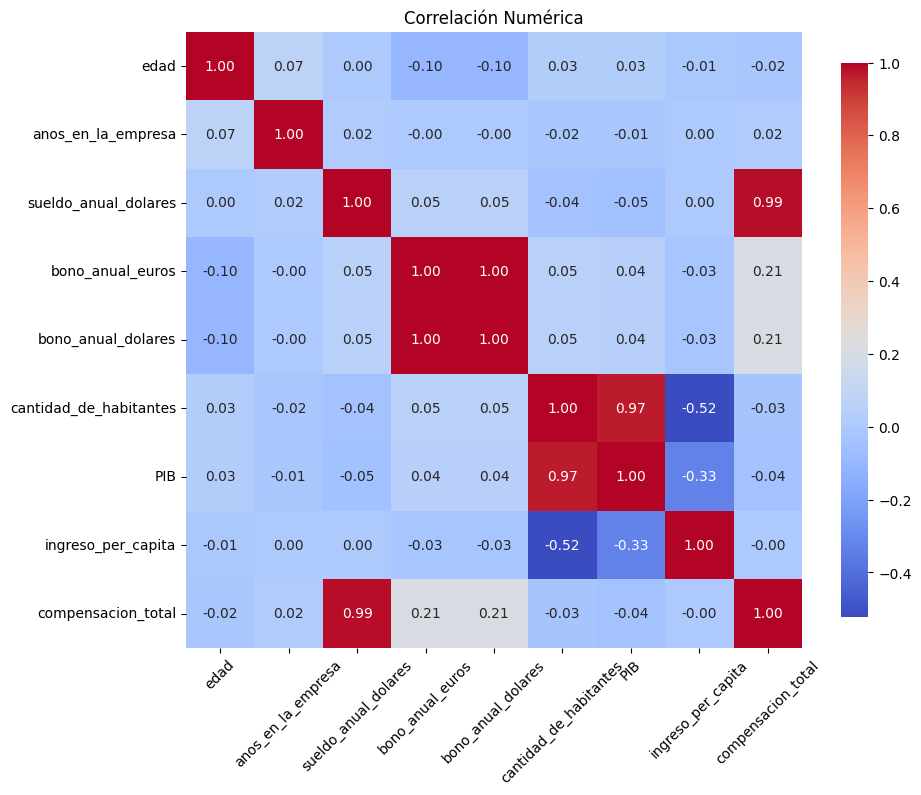

In [31]:
# Matriz de correlación numérica con heatmap
numerical_cols = df_salarios_pais.select_dtypes('number')
correlacion = numerical_cols.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .9})
plt.title('Correlación Numérica')
plt.xticks(rotation=45)
plt.show()

## 1️⃣2️⃣ Pregunta  
**¿Qué porcentaje de empleados del dataset tiene educación universitaria?**

### ¿Por qué importa?**  
- Mide el nivel de formación académica dentro de la organización.  
- Sirve de referencia para programas de capacitación, becas y desarrollo profesional.  
- Permite contrastar la brecha (si existe) entre compensación y formación.

### Pista
Usa `value_counts(normalize=True)` en la columna `educacion_universitaria`, luego multiplica por 100 para obtener el porcentaje.

In [36]:
# Porcentaje de empleados con y sin educación universitaria
empleados_con_educacion = df_salarios_pais['educacion_universitaria'].value_counts(normalize=True) * 100
print("Porcentaje de empleados con y sin educación universitaria:") 
print(empleados_con_educacion)


Porcentaje de empleados con y sin educación universitaria:
educacion_universitaria
Sí    51.791531
No    48.208469
Name: proportion, dtype: float64


## 1️⃣3️⃣ Pregunta  
**¿Cuál es la compensación total promedio por país y nivel de senioridad?**  
*(Presenta la respuesta en una tabla pivote).*

### ¿Por qué importa?  
- Permite comparar si la diferencia salarial entre Juniors y Seniors es coherente en todos los países.  
- Identifica países donde los Seniors se pagan por encima o por debajo de la media global.  
- Ayuda a diseñar políticas de compensación regionales y ajustar los planes de carrera.

### Pista  
Crea una tabla pivote con `index='pais'`, `columns='senioridad'` y `values='compensacion_total'`, usando `aggfunc='mean'`.

In [ ]:
# Tabla pivote: compensación promedio por país y senioridad
promedio_pais_senioridad = df_salarios_pais.pivot_table(index='pais', columns='senioridad', values='compensacion_total', aggfunc='mean').reset_index()
print("Tabla pivote: compensación promedio por país y senioridad:") 
print(promedio_pais_senioridad)


Tabla pivote: compensación promedio por país y senioridad:
senioridad        pais         Junior         senior
0            Argentina   89211.747368   96921.354545
1                Chile   97065.143750   98729.214286
2             Colombia   96912.622727  100323.395238
3           Costa Rica  103058.793333   86087.170833
4               México   86462.661111   94921.744000
5               Panamá   90936.825000   94432.906250
6                 Perú   92564.366667   93887.389474
7              Uruguay   91380.053333   99751.686957


## 1️⃣4️⃣ Pregunta  
**¿Qué relación existe entre el salario anual y el bono anual?**  
*(Visualízalo en un scatterplot).*

### ¿Por qué importa?  
- Permite ver si los bonos son proporcionales al salario base o se otorgan de forma independiente.  
- Ayuda a detectar empleados con bonos atípicamente altos respecto a su sueldo.  
- Informa sobre la política de incentivos y su coherencia interna.

### Pista  
Usa `sns.scatterplot()` con `x='sueldo_anual_dolares'` y `y='bono_anual_dolares'`.

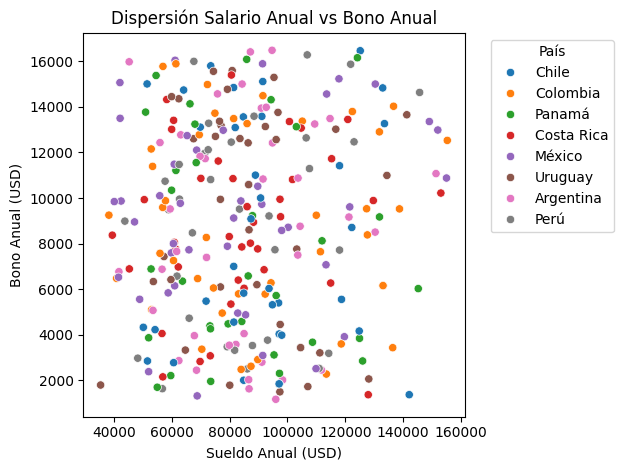

In [46]:
# Dispersión salario anual vs bono anual
ax = sns.scatterplot(data=df_salarios_pais, x='sueldo_anual_dolares', y='bono_anual_dolares', hue='pais')
plt.title('Dispersión Salario Anual vs Bono Anual')
plt.xlabel('Sueldo Anual (USD)')   
plt.ylabel('Bono Anual (USD)')

plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.5)
plt.tight_layout()
plt.show()


## 1️⃣5️⃣ Pregunta  
**¿Qué porcentaje de empleados lleva más de 5 años en la empresa?**

### ¿Por qué importa?  
- Mide la **retención de talento** y la estabilidad de la plantilla.  
- Un porcentaje alto indica lealtad y experiencia acumulada; uno bajo puede señalar rotación elevada.  
- Informa iniciativas de engagement y programas de reconocimiento para empleados veteranos.

### Pista  
Aplica una condición `df['anos_en_la_empresa'] > 5`, usa `.mean()` para obtener la proporción y multiplícalo por 100.

In [ ]:
# Porcentaje de empleados con más de 5 años en la empresa
porcentaje_mas_5_anos = (df_salarios_pais['anos_en_la_empresa'] > 5).mean() * 100
print("Porcentaje de empleados con más de 5 años en la empresa:")
print(f"{porcentaje_mas_5_anos:.2f}%")


Porcentaje de empleados con más de 5 años en la empresa:
55.700325732899024%


## 1️⃣6️⃣ Pregunta  
**¿Qué país presenta el bono anual promedio más alto?**

### ¿Por qué importa?  
- Indica dónde la empresa invierte más en incentivos variables.  
- Ayuda a evaluar la competitividad de los planes de bonificación por región.  
- Puede revelar disparidades que requieran revisión de políticas de compensación.

### Pista  
Agrupa por `pais`, calcula la media de `bono_anual_dolares` y ordena de mayor a menor.

In [55]:
# País con el bono anual promedio más alto
bono_anual_promedio = df_salarios_pais.groupby('pais')['bono_anual_dolares'].mean().reset_index()
pais_bono_anual_maximo = bono_anual_promedio.loc[bono_anual_promedio['bono_anual_dolares'].idxmax()]
print(f"País con el bono anual promedio más alto: {pais_bono_anual_maximo['pais']} con un promedio de {pais_bono_anual_maximo['bono_anual_dolares']:.2f}")
print(bono_anual_promedio)


País con el bono anual promedio más alto: México con un promedio de 9359.85
         pais  bono_anual_dolares
0   Argentina         8466.512195
1       Chile         8285.616216
2    Colombia         8851.418605
3  Costa Rica         8811.282051
4      México         9359.848837
5      Panamá         7833.271875
6        Perú         8967.555882
7     Uruguay         9281.568421


## 1️⃣7️⃣ Pregunta  
**¿Cómo varía la distribución de la compensación total entre países?**  
*(Muestra un boxplot por país para comparar rangos y outliers).*

### ¿Por qué importa?  
- Visualiza diferencias salariales entre mercados.  
- Ayuda a identificar países con mayor dispersión o presencia de outliers altos/bajos.  
- Facilita decisiones sobre ajustes regionales y equidad interna.

### Pista  
Emplea `sns.boxplot()` con `x='pais'` y `y='compensacion_total'`; rota las etiquetas para que no se solapen.

C:\Users\joseg\AppData\Local\Temp\ipykernel_15208\3720597623.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_salarios_pais, x='pais', y='compensacion_total', palette='Set2')


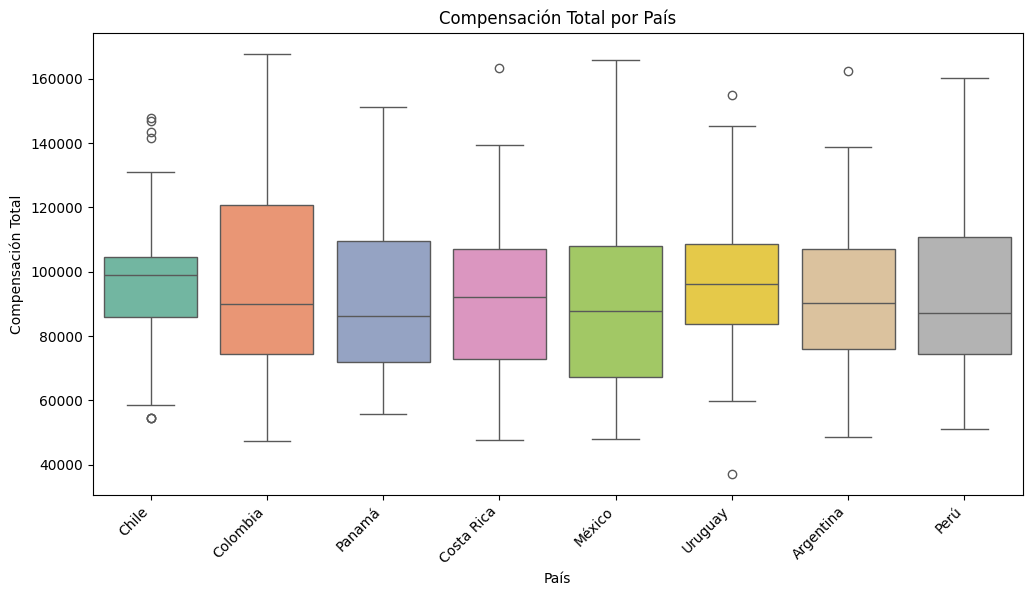

In [56]:
# Boxplot de compensación total por país
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_salarios_pais, x='pais', y='compensacion_total', palette='Set2')
plt.title('Compensación Total por País')
plt.xlabel('País')
plt.ylabel('Compensación Total')
plt.xticks(rotation=45, ha='right')
plt.show()

## 1️⃣8️⃣ Pregunta  
**¿Cuál es el promedio de años en la empresa para cada cargo?**

### ¿Por qué importa?  
- Indica qué roles retienen talento por más tiempo.  
- Ayuda a identificar posiciones con alta rotación que podrían requerir planes de carrera o incentivos adicionales.  
- Ofrece información para comparar madurez y profundidad de experiencia entre áreas.

### Pista  
Agrupa por `cargo`, aplica `mean()` sobre `anos_en_la_empresa` y ordena descendente para ver los cargos con mayor antigüedad media.

In [57]:
# Promedio de años en la empresa por cargo
promedio_anos_por_cargo = df_salarios_pais.groupby('cargo')['anos_en_la_empresa'].mean().reset_index()
print("Promedio de años en la empresa por cargo:")
print(promedio_anos_por_cargo.sort_values(by='anos_en_la_empresa', ascending=False).head().reset_index(drop=True))


Promedio de años en la empresa por cargo:
                  cargo  anos_en_la_empresa
0         Product Owner            7.789474
1        Data Scientist            7.000000
2      Python Developer            6.666667
3          Data Analyst            6.621622
4  AI Software Engineer            6.517241


## 1️⃣9️⃣ Pregunta  
**¿Cuál es la mediana del ingreso per cápita entre los países presentes en el dataset?**

### ¿Por qué importa?  
- Brinda un punto de referencia de **poder adquisitivo** promedio para las regiones donde opera la empresa.  
- Facilita comparar la compensación interna con los niveles de ingreso del país, aportando contexto sobre competitividad salarial local.  
- La mediana es robusta frente a valores extremos y refleja mejor el ingreso “típico” que el promedio en economías dispares.

### Pista  
Basta con aplicar `.median()` a la columna `ingreso_per_capita`.

In [58]:
# Mediana del ingreso per cápita de los países
media_ingreso_per_capita = df_salarios_pais.groupby('pais')['ingreso_per_capita'].median().reset_index()
print("Mediana del ingreso per cápita de los países:")  
print(media_ingreso_per_capita.sort_values(by='ingreso_per_capita', ascending=False).head().reset_index(drop=True))
print(media_ingreso_per_capita.describe())


Mediana del ingreso per cápita de los países:
         pais  ingreso_per_capita
0     Uruguay             20300.0
1      Panamá             16995.0
2       Chile             16580.0
3  Costa Rica             14319.0
4   Argentina             14120.0
       ingreso_per_capita
count            8.000000
mean         13501.875000
std           4677.468468
min           6611.000000
25%          10367.500000
50%          14219.500000
75%          16683.750000
max          20300.000000


## 2️⃣0️⃣ Pregunta  
**¿Cómo se distribuyen los bonos anuales (USD) según el nivel de senioridad?**  
*(Representa la comparación con un violinplot).*

### ¿Por qué importa?  
- Muestra no solo la mediana y el rango, sino la **densidad completa** de los bonos para Juniors y Seniors.  
- Facilita detectar si los rangos de bonos se solapan o si los Seniors reciben incentivos notablemente mayores.  
- Ayuda a evaluar la equidad y efectividad del esquema de bonificación por experiencia.

### Pista  
Usa `sns.violinplot()` con `x='senioridad'` y `y='bono_anual_dolares'`.

C:\Users\joseg\AppData\Local\Temp\ipykernel_15208\1146787198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_salarios_pais, x='senioridad', y='bono_anual_dolares', palette='Set2')


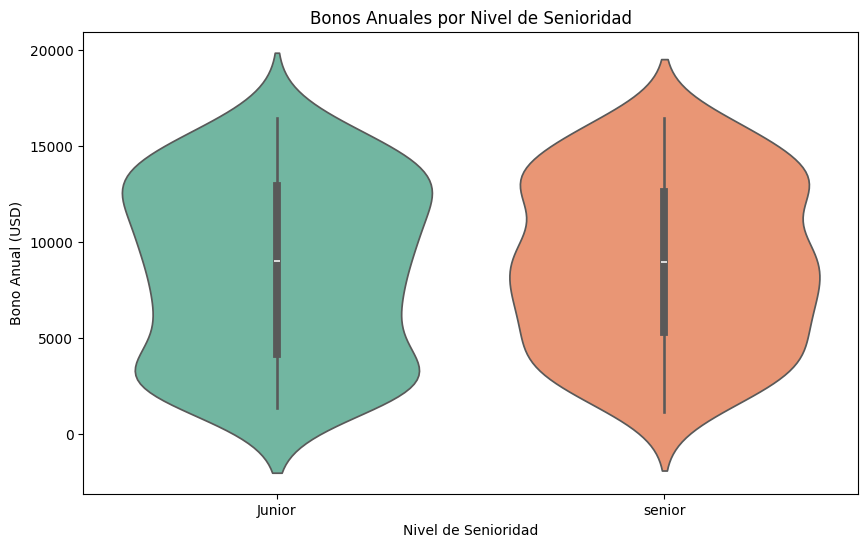

In [59]:
# Violinplot de bonos anuales por senioridad
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_salarios_pais, x='senioridad', y='bono_anual_dolares', palette='Set2')
plt.title('Bonos Anuales por Nivel de Senioridad')      
plt.xlabel('Nivel de Senioridad')
plt.ylabel('Bono Anual (USD)')
plt.show()

## 🎉 ¡Felicidades!

Has completado el proyecto integral de **Análisis de Datos con Python**.  
Pasaste por todo el ciclo:

1. **Preparar el entorno**  
2. **Limpiar y transformar datos**  
3. **Explorar con visualizaciones**  
4. **Responder preguntas de negocio reales**

Cada notebook, gráfico y métrica que generaste demuestra tu capacidad para convertir datos en información valiosa. ¡Sigue practicando, comparte tus hallazgos con la comunidad PyData Panamá y recuerda que el siguiente insight puede cambiar una decisión clave!

🚀 **Buen trabajo, Data Analyst**. 